<a href="https://colab.research.google.com/github/TalesMiguel/RNA/blob/main/RNA_trabalho2_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Artificiais - Trabalho 02: Modelo Não-Supervisionado**

### **Feito por:**
Camilo Maia Pires - 140473

Tales Miguel Machado Pereira - 140247

##**Rede Neural SOM (Self-Organizing Maps)**

Self-Organizing Map (SOM) é uma Rede Neural de aprendizado não-supervisionado baseado em aprendizado competitivo. É utilizada principalmente em cenários onde dado um dataset, sua saída possui um número muito menor de dimensões. Esta é então uma representação discreta dos dados de entrada, que tende a representar bem o conjunto.

A rede SOM busca adaptar interativamente uma matriz de duas dimensões de vetores (ou neurônios/nós) a uma topologia de maior dimensão de um dataset em questão. Em seu aprendizado competitivo, os neurônios competem entre si para determinar quem será ativado (*winner*) dado uma entrada. Os neurônios estão ligados num mapa topográfico, o que significa que a informação gerada por um input é representada por neurônios vizinhos dada uma região. Por conta disso, um neurônio vencedor também impacta seus vizinhos, podendo inclusive reduzir a atividade dos neurônios em seu entorno através de inibições laterais, que geram feedback negativo.

<br>

##**Como funciona a rede SOM?**##
https://miro.medium.com/v2/resize:fit:442/format:webp/1*iqxpENhkzkiLErlqssmIOw.png

A cada ciclo, um neurônio é escolhido e seus pesos são atualizados em conjunto com seus vizinhos para se aproximarem de um dado escolhido aleatoriamente do conjunto de treino. Durante o estágio de atualização, o neurônio mais próximo do dado vence a competição, e seus pesos serão atualizados, assim como de seus vizinhos.


##**Passo-a-passo:**

1.   Instalação dos pacotes necessários
2.   Carregamento de dois *datasets*
3.   Treinamento de um modelo
4.   Plotagem e análise de gráficos
5.   Alteração de parâmetros
6.   Plotagem e análise de gráficos com parâmetros alterados
7.   Repetição dos passos 4 a 7 para o segundo *dataset*.



**Dataset 01:** [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

**Dataset 02:** TBD

## **1. Instalação dos pacotes necessários**

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=cd833dec8b0ee2b38d9c6c450a852e70c2a7d866acce4373f7784b5069622ece
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [2]:
from minisom import MiniSom
import sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##** 2. Carregamento de dois *datasets***

O primeiro *dataset* é o **Breast Cancer Winsconsin Dataset**, de 1995. Ele possui 569 amostras divididas entre duas classes ("malignant", "benign") e 30 dimensões no formato de 10 características para cada tipo de cálculo ("mean", "standard error", "worst"), sendo elas:

1. radius (mean of distances from center to points on the perimeter)

2. texture (standard deviation of gray-scale values)

3. perimeter

4. area

5. smoothness (local variation in radius lengths)

6. compactness (perimeter^2 / area - 1.0)

7. concavity (severity of concave portions of the contour)

8. concave points (number of concave portions of the contour)

9. symmetry

10. fractal dimension (“coastline approximation” - 1)

In [3]:
dataset_1 = sklearn.datasets.load_breast_cancer()
dataset_2 = None

df_1 = pd.DataFrame(dataset_1.data, columns=dataset_1.feature_names)
# df_2 = pd.DataFrame(dataset_2.data, columns=dataset_2.feature_names)

df_1['label'] = [dataset_1.target_names[i] for i in dataset_1.target]
# df_2['label'] = [dataset_2.target_names[i] for i in dataset_2.target]


In [ ]:
print(df_1)
#print(df_2)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
x = df_1.drop(['label'], axis=1)

labels = df_1.label.unique()
# 0==malignant, 1==benign
df_1.label.replace(labels, range(len(labels)), inplace=True)
target = df_1['label'].values
print(df_1.tail())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  wo

<ipython-input-8-8d58a8b4b75b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1.label.replace(labels, range(len(labels)), inplace=True)
<ipython-input-8-8d58a8b4b75b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.label.replace(labels, range(len(labels)), inplace=True)


Text(0.5, 1.0, 'HeatMap de correlação entre atributos')

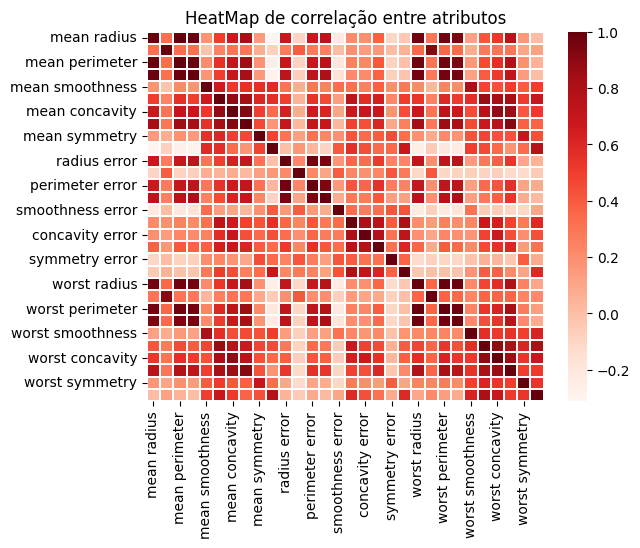

In [ ]:
sns.heatmap(x.astype(float).corr(), linewidths=0.05, linecolor='white', cmap='Reds')
plt.title("HeatMap de correlação entre atributos")

In [ ]:
sigma = 5
eta = 0.1
epocas = 500
random_seed = 1

neighbourhood_function = 'gaussian'
topology = "hexagonal"
# topology = "rectangular"
nl = 10 # número de neurônios (linha)
nc = 7 # número de neurônios (coluna)

In [ ]:
som = MiniSom(nl, nc, x.shape[1], sigma=sigma, learning_rate=eta,
             neighborhood_function=neighbourhood_function,
             random_seed=random_seed, topology=topology)
# som.pca_weights_init(x)
som.random_weights_init(x.values)
som.train_random(x.values, epocas)

In [ ]:
som.quantization_error(x.values)

90.38726360967624

In [ ]:
som.topographic_error(x.values)


0.25307557117750434

## Mapa de Distribuição das Classes

Aqui temos uma distribuição U-Matrix para visualização da distância entre os neurônios.

<function matplotlib.pyplot.show(close=None, block=None)>

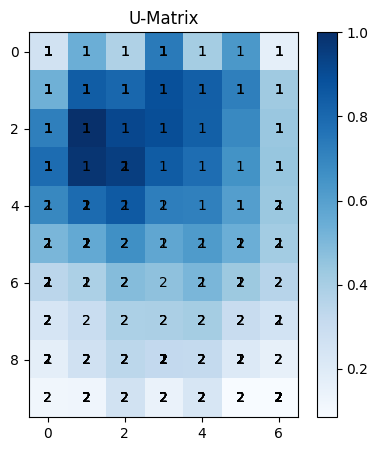

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()

for idx, xx in enumerate(x.values):
    w = som.winner(xx)
    plt.text(w[1], w[0], target[idx]+1, horizontalalignment='center', verticalalignment='center')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

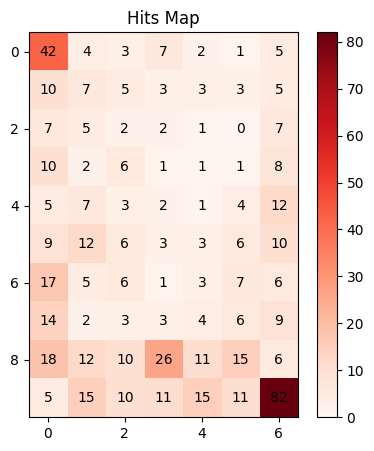

In [ ]:
hits = som.activation_response(x.values).astype(int)
plt.figure(figsize=(5,5),dpi=100)
plt.imshow(hits, cmap='Reds')
plt.title('Hits Map')
plt.colorbar()
for (i,j), value in np.ndenumerate(hits):
  plt.text(j, i, value, ha='center', va='center')
plt.show